In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

In [198]:
df = pd.read_csv('./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [199]:
df.drop('Id',axis=1,inplace=True)

In [200]:
df.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [201]:
X = df.drop('Class',axis=1)
Y = df['Class']

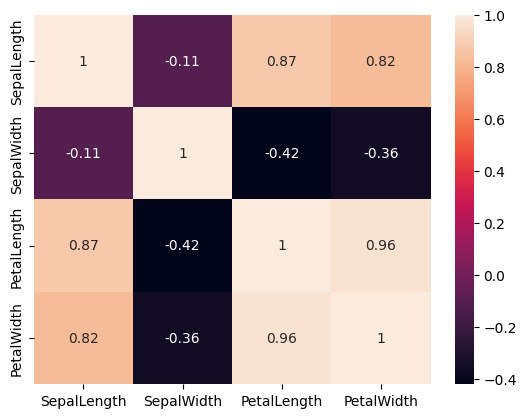

In [202]:
sns.heatmap(x.corr(),annot=True);

In [203]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

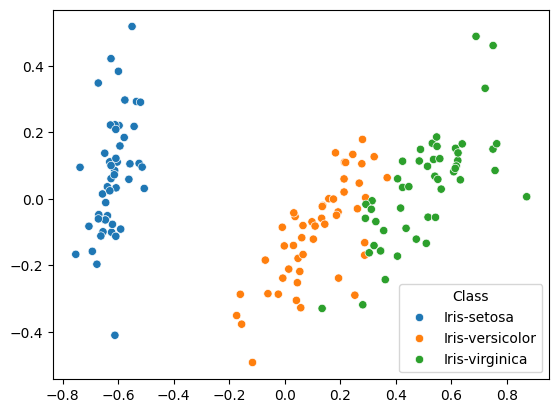

In [204]:
x_reduced = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x = x_reduced[:,0],y = x_reduced[:,1],hue=Y);

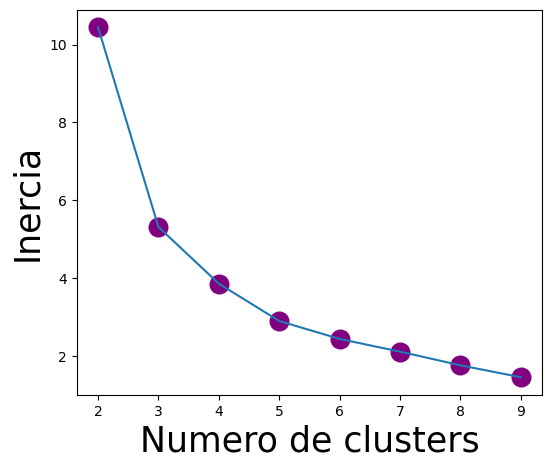

In [205]:
k_rng = range(2,10)
inercias = []
for k in k_rng:
  kmeans = KMeans(n_clusters=k,n_init=10).fit(x_reduced)
  inercias.append(kmeans.inertia_)

plt.figure(figsize=(6,5),dpi=100)
plt.scatter(k_rng,inercias,marker='o',s=180,color='purple')
plt.plot(k_rng,inercias)
plt.xlabel('Numero de clusters',fontsize=25)
plt.ylabel('Inercia',fontsize=25);

In [206]:
le = LabelEncoder()
Y = le.fit_transform(Y)
df['Class'] = Y

In [207]:
df['Class'].nunique()

3

In [208]:
kmeans = KMeans(n_clusters=3,n_init=10,max_iter=300,random_state=21).fit(df)
y_pred = kmeans.predict(df)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [218]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [210]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     , 0.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

In [211]:
kmeans.inertia_

87.31002785114046

In [212]:
accuracy_score(Y, y_pred)

0.9933333333333333

In [213]:
confusion_matrix(Y,y_pred)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  1, 49]], dtype=int64)

In [214]:
df['y_pred'] = y_pred

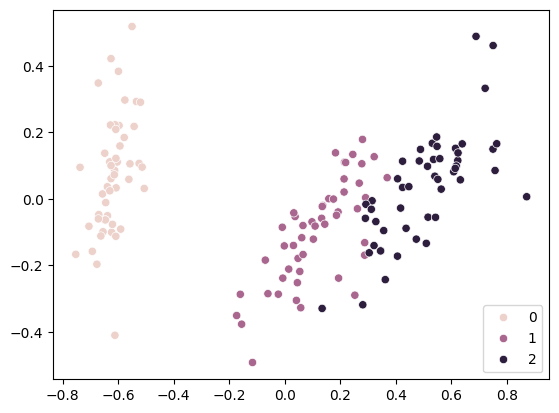

In [215]:
sns.scatterplot(x = x_reduced[:,0],y = x_reduced[:,1],hue=Y);

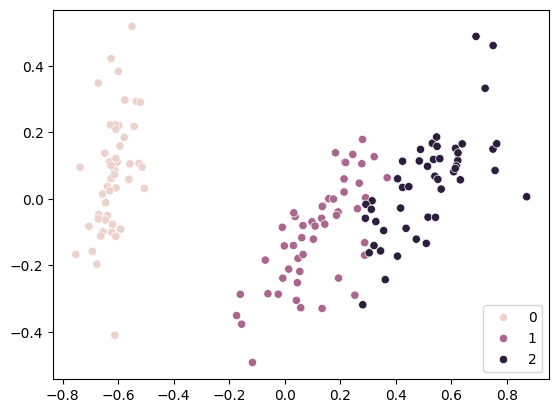

In [216]:
sns.scatterplot(x = x_reduced[:,0],y = x_reduced[:,1],hue=y_pred);

In [244]:
df1 = pd.DataFrame(x_reduced)
df1['y_pred'] = y_pred
df1

,0,1,y_pred
0,-0.630361,0.111556,0
1,-0.623546,-0.100313,0
2,-0.669793,-0.047220,0
3,-0.654633,-0.098791,0
4,-0.648263,0.137558,0
...,...,...,...
145,0.551755,0.058990,2
146,0.406278,-0.172227,2
147,0.447293,0.036996,2
148,0.489218,0.149121,2


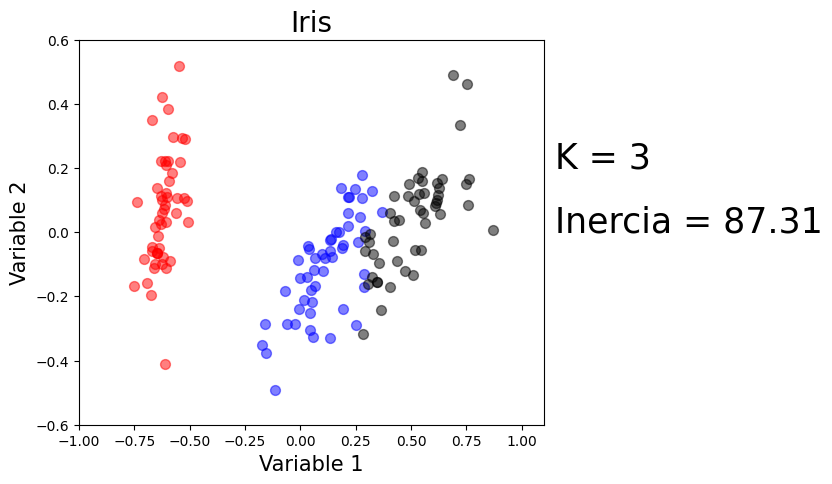

In [245]:
plt.figure(figsize=(6,5),dpi=100)
colores = ['red','blue','black','purple','pink','brown']

for cluster in range(kmeans.n_clusters):
  plt.scatter(df1[df1['y_pred']==cluster][0],
              df1[df1['y_pred']==cluster][1],
              marker='o',s=50,color=colores[cluster],alpha=0.5)

  plt.scatter(kmeans.cluster_centers_[cluster][0],
              kmeans.cluster_centers_[cluster][1],
              marker='P',s=80,color=colores[cluster])

plt.title('Iris',fontsize=20)
plt.xlabel('Variable 1',fontsize=15)
plt.ylabel('Variable 2',fontsize=15)
plt.text(1.15,0.2,'K = %i' % kmeans.n_clusters,fontsize=25)
plt.text(1.15,0,'Inercia = %0.2f' % kmeans.inertia_,fontsize=25)
plt.xlim(-1.0,1.1)
plt.ylim(-0.6,0.6)
plt.show()